In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

Preparando banco para modelagem

In [45]:
# Importando
banco = pd.read_excel("Dados\default of credit card clients.xls",header=1)

# Mudando o tipo das variáveis que são categóricas
banco.SEX = banco.SEX.astype("category")
banco.EDUCATION = banco.EDUCATION.astype("category")
banco.MARRIAGE = banco.MARRIAGE.astype("category")
banco.PAY_0 = banco.PAY_0.astype("category")
banco.PAY_2 = banco.PAY_2.astype("category")
banco.PAY_3 = banco.PAY_3.astype("category")
banco.PAY_4 = banco.PAY_4.astype("category")
banco.PAY_5 = banco.PAY_5.astype("category")
banco.PAY_6 = banco.PAY_6.astype("category")

# Separando a variável resposta
X=banco.loc[:, 'LIMIT_BAL':'PAY_AMT6']
y=banco["default payment next month"]

Calculando correlação

In [46]:
correlacao = X.corr()
correlacao.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


Removendo covariáveis com alta correlação

In [47]:
## Selecionando o triângulo superior da matriz de correlação
upper = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))

In [48]:
## Encontrando as colunas com correlação maior do que 0.6

to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

print(to_drop)

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [49]:
## Banco sem as variáveis altamente correlacionadas

X = X.drop(X[to_drop], axis=1)

In [50]:
## Problema de correlação continua não resolvido

teste = X.corr()
teste.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
PAY_AMT1,0.195236,0.026147,0.140277,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_AMT3,0.210167,0.029247,0.156887,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_AMT4,0.203242,0.021379,0.158303,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834
PAY_AMT5,0.217202,0.022850,0.167026,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896
PAY_AMT6,0.219595,0.019478,0.179341,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000


Dividindo banco de treino e verificação

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

Montando função de prototipagem

In [57]:
def prototipo(modelo,xtreino,ytreino,xteste,yteste):
    modelo.fit(xtreino,ytreino)

    y_test_pred = modelo.predict(xteste)
    #matriz de confusão
    print(confusion_matrix(yteste, y_test_pred))
    #estatísticas gerais do modelo
    print(classification_report(yteste, y_test_pred))
    #curva ROC
    fpr, tpr, _ = roc_curve(yteste, y_test_pred)
    fig, ax = plt.subplots()
    ax.plot(fpr,tpr)
    ax.set(xlabel='True Positive Rate',ylabel='False Positive Rate')
    plt.show()

Regressão Logística

c:\users\gta19\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gta19\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\gta19\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined a

[[7024    0]
 [1976    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7024
           1       0.00      0.00      0.00      1976

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



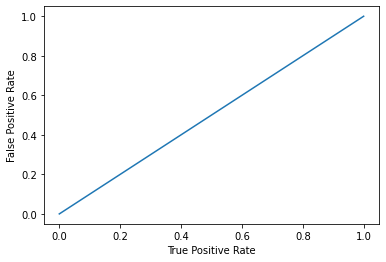

In [58]:
lr = LogisticRegression()
prototipo(lr,X_train,y_train,X_test,y_test)

Regressão Logística com SGD

[[7023    1]
 [1976    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7024
           1       0.00      0.00      0.00      1976

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



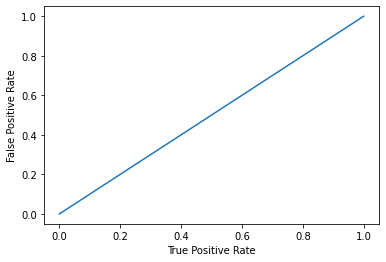

In [59]:
lr_sgd = SGDClassifier(loss='log')

prototipo(lr_sgd,X_train,y_train,X_test,y_test)

Support Vector Machine

[[6862  162]
 [1929   47]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      7024
           1       0.22      0.02      0.04      1976

    accuracy                           0.77      9000
   macro avg       0.50      0.50      0.46      9000
weighted avg       0.66      0.77      0.69      9000



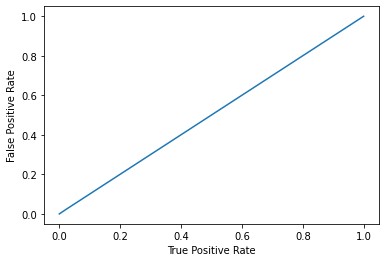

In [60]:
svc = SGDClassifier()

prototipo(svc,X_train,y_train,X_test,y_test)

Árvore de Decisão

[[5706 1318]
 [1202  774]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7024
           1       0.37      0.39      0.38      1976

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.72      0.72      9000



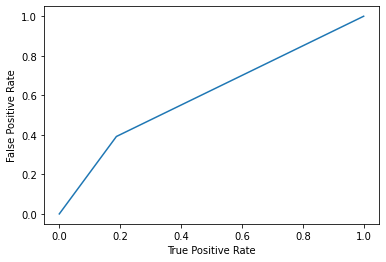

In [61]:
arvore = tree.DecisionTreeClassifier()

prototipo(arvore,X_train,y_train,X_test,y_test)

Árvore Aleatória

[[6619  405]
 [1217  759]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7024
           1       0.65      0.38      0.48      1976

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



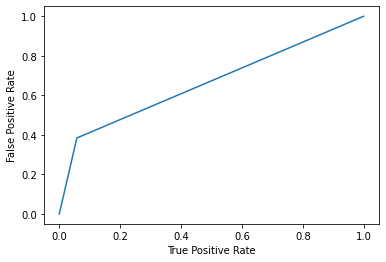

In [62]:
arvore_aleatoria = RandomForestClassifier()

prototipo(arvore_aleatoria,X_train,y_train,X_test,y_test)